# MATH50003 (2025–26)
# Revision Lab

In [23]:
using LinearAlgebra, SetRounding, Test, Plots

**Problem 1(a)** Simpson's rule on a single panel is given by
$$
∫_a^b f(x) {\rm d}x ≈ {b-a \over 6} \left[f(a) + 4 f\!\left({a+b \over 2}\right) + f(b) \right].
$$
Complete the implementation of `simpsonsrule` by dividing $[0,1]$ into grid points $x_0, x_1, …, x_{2n}$ with $x_k = k/(2n)$
and applying Simpson's rule on the intervals $[x_{2k-2},x_{2k}]$ for $k = 1,…,n$.

In [24]:
function simpsonsrule(f, n)
    x = range(0, 1, 2n + 1)
    sum = 0
    for k in 1:n
        sum += f(x[2k - 1]) + 4*f(x[2k]) + f(x[2k+1])
    end
    sum/(6n)
end

@test simpsonsrule(exp, 1000) ≈ exp(1)-1

Test Passed

**Problem 1(b)** By computing with various values of $n$, conjecture what the convergence rate is as $n → ∞$. Is it faster than Trapezium rules $O(n^{-2})$?

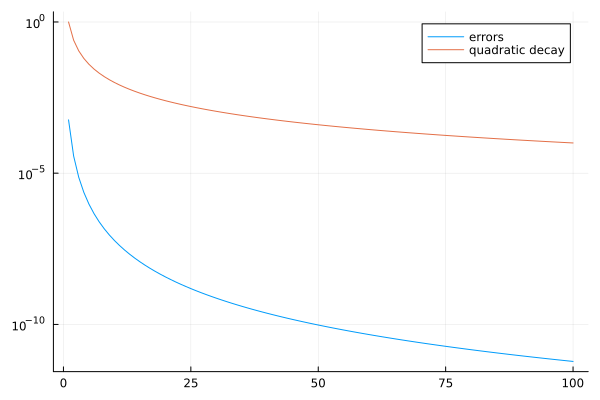

In [43]:
errors = [abs(simpsonsrule(exp,n) - exp(1) + 1) for n in 1:100]
f = x -> x^(-2)
plot(1:100, errors; label="errors", yscale=:log10)
plot!(1:100, f.(range(1,100)); label="quadratic decay")

Comparing with the errors computed in an earlier lab, the convergence rate is faster than Trapezium rules.

**Problem 2** Consider a 3-term divided-difference approximation
$$
f'(x) ≈ {5f(x+2h) - 3f(x) - 2f(x-h) \over 12h}
$$
Implement this in the following function.

In [44]:
function threeterm_divideddifference(f, x, h)
    df = 5f(x + 2h) - 3f(x) - 2f(x-h)
    df/12h
end
@test threeterm_divideddifference(exp, 0, 0.0000001) ≈ 1 atol=1E-5

Test Passed

**Problem 3** Using the following simplified `Dual` implementation, consider a double-dual number
like `Dual(Dual(a,b), Dual(c,d))`. By choosing `a`, `b`, `c` and `d`, construct the function `secondderivative(f, x)`
that computes the second derivative of a function. Hint: it might help to think of a double-dual number as
$(a + b*ε) + δ*(c + d*ε)$ where $ε^2 = δ^2 = 0$.

In [45]:
struct Dual
    a
    b
end

import Base: +, *, exp
function +(x::Dual, y::Dual)
    a,b = x.a, x.b # x == a+bϵ. This gets out a and b
    c,d = y.a, y.b # y == c+dϵ. This gets out c and d
    Dual(a+c, b+d)
end
function *(x::Dual, y::Dual)
    a,b = x.a, x.b # x == a+bϵ. This gets out a and b
    c,d = y.a, y.b # y == c+dϵ. This gets out c and d
    Dual(a*c, b*c + a*d)
end
exp(x::Dual) = Dual(exp(x.a), exp(x.a) * x.b)


function secondderivative(f, x)
    ret = f(Dual(Dual(x,1),Dual(1,0)))
    (ret.b).b
end

f = x -> exp(x*exp(x))
@test secondderivative(f, 0) ≈ 3

Test Passed

**Problem 4** Implement the `sqrt` function with correctly rounded interval arithmetic.

In [46]:
struct Interval # represents the set [a,b]
    a # left endpoint
    b # right endpoint
end

Interval(x) = Interval(x,x) # Support Interval(1) to represent [1,1]

import Base: sqrt, in
in(x, X::Interval) = X.a ≤ x ≤ X.b

function sqrt(X::Interval)
    a,b = promote(X.a, X.b) # make sure all are the same type
    T = typeof(a)
    α = setrounding(T, RoundDown) do
        sqrt(a)
    end
    β = setrounding(T, RoundUp) do
        sqrt(b)
    end
    Interval(α, β)
end

@test sqrt(big(2.0)) in sqrt(Interval(2.0))

Test Passed

**Problem 5** A one-hot vector is a concept used in machine learning to define a vector with a single non-zero entry.
Complete the following data structure

In [ ]:
struct OneHotVector <: AbstractVector{Float64}
    c::Float64
    j::Int
    n::Int
end

import Base: size, getindex
size(a::OneHotVector) = (a.n,)

function getindex(a::OneHotVector, k::Int)
    if k ≤ 0 || k > a.n
        error("dimension mismatch")
    end
    # TODO: return the entry of a in the kth index

end

@test OneHotVector(1.5, 2, 4) == [0,1.5,0,0]

**Problem 6** Implement `reversecholesky(A)` that returns an upper-triangular matrix `U` such that `U*U' ≈ A`.
You may assume the input is symmetric positive definite and has `Float64` values. You must not use the inbuilt `cholesky`
function or in any other way reduce the problem to a standard Cholesky factorisation.

In [ ]:
function reversecholesky(A)
    n,m = size(A)
    if n ≠ m
        error("Matrix must be square")
    end
    if A ≠ A'
        error("Matrix must be symmetric")
    end
    U = UpperTriangular(zeros(n,n))
    # TODO: populate U so that U'U ≈ A

    U
end

A = [2 1 0; 1 2 1; 0 1 2]
U = reversecholesky(A)
@test U*U' ≈ A

**Problem 7(a)**  Construct a reverse Householder reflection, that gives an orthogonal matrix
$Q$ such that, for $𝐱 ∈ ℝ^n$,
$$
𝐱^⊤ Q = \|𝐱\|𝐞_1^⊤.
$$

In [ ]:
function reversehouseholderreflection(x)
    # TODO: implement a Householder reflection that acts on the left

end

x = randn(5)
Q = reversehouseholderreflection(x)
@test x'Q ≈ [norm(x) zeros(1,4)]

**Problem 7(b)**
Complete the function `lq(A)` that
returns a LQ factorisation, that is, `A = LQ` where  `L` is lower triangular and `Q` is an orthogonal
matrix. You may assume that `A` is a square `Matrix{Float64}`.  Do not manipulate the problem
to reduce it to a standard QR factorisation.

In [ ]:
function lq(A)
    m,n = size(A)
    m == n || error("not square")
    # TODO Create Q and L such that A = L*Q, Q'Q == I and L is lower triangular

end

A = [1.0 2 3; 1 4 9; 1 1 1]
L,Q = lq(A)
@test Q'Q ≈ I
@test L*Q ≈ A
@test L ≈ tril(L) # it is acceptable to have small non-zero entries in L

**Problem 8** Complete the function `lagrangebasis(g, k, x)` where `g` is a vector of grid
points, that computes the Lagrange basis function at the point `x`. You may assume all numbers
are `Float64`.

In [ ]:
function lagrangebasis(g::AbstractVector, k, x)
    n = length(g) # number of points
    ## TODO: compute ℓ_k(x) corresponding to the grid g

end

g = 1:5
@test lagrangebasis(g, 2, 2) == 1
@test lagrangebasis(g, 2, 3) == lagrangebasis(g, 2, 4) ==  0
@test lagrangebasis(g, 3, 0.1) ≈ 8.169525

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*